<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/06-SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Máquinas de soporte vectorial
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Andrés Merino &bull; 2025-04
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller, aplicaremos el algoritmo de máquinas de soporte vectorial (SVM) para clasificar un conjunto de datos.

Los paquetes necesarios son:

In [12]:
# Paquetes necssarios
import pandas as pd  # Manejo de datos
import matplotlib.pyplot as plt  # Visualización

from sklearn.preprocessing import StandardScaler  # Estandarización de datos
from sklearn.model_selection import train_test_split  # División de datos
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Métricas

# Algoritmos de clasificación
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


---
## <font color='264CC7'> Clasificación </font>


### <font color='264CC7'> Preprocesamiento de datos </font>

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase anterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>

In [8]:
# Cargar datos
url = "https://raw.githubusercontent.com/KevinDC593-PRO/Tareas/main/dataset_personajes_ficticio_520.xlsx"
df = pd.read_excel(url)

# Seleccionar columnas numéricas y clase
numeric_cols = ['ataque','defensa','velocidad','poder_especial','resistencia','agilidad','inteligencia','carisma']
class_col = 'clase'
data = df[['personaje', *numeric_cols, class_col]]

# Escalar los datos (solo numéricas)
scaler = StandardScaler()
X = scaler.fit_transform(data.iloc[:, 1:-1])

# Mostrar algunos datos
df.head()

,id,personaje,franquicia,clase,ataque,defensa,velocidad,poder_especial,resistencia,agilidad,inteligencia,carisma,rango
0,1,Ryu,Street Fighter,Tirador,72,64,86,50,57,86,57,65,68
1,2,Ken Masters,Street Fighter,Guerrero,89,81,76,80,81,66,64,46,80
2,3,Chun-Li,Street Fighter,Tirador,80,57,72,79,65,81,56,71,72
3,4,Guile,Street Fighter,Tanque,63,93,74,61,88,43,66,72,72
4,5,Cammy,Street Fighter,Tanque,53,83,61,72,96,44,62,59,69



### <font color='264CC7'> Determinación del mejor kernel </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Determina el mejor kernel para el modelo SVM.
<ul>
  <li>Genera una gráfica que muestre la precisión de los modelos con diferentes kernels.</li>
  <li>Selecciona el mejor kernel.</li>
</ul>
</div>


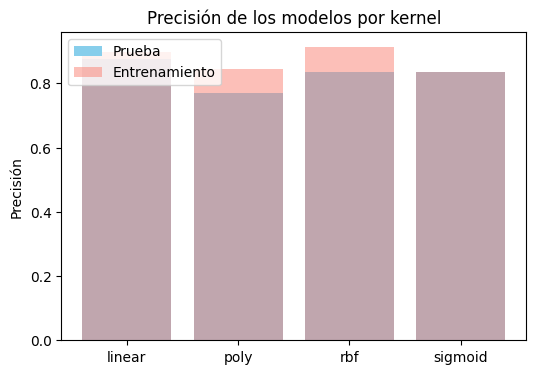

Mejor kernel: linear


In [10]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, data['clase'], test_size=0.2, random_state=42, stratify=data['clase']
)

# Kernels a probar
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']

# Precisión de los modelos
precisions_test = []
precisions_train = []

for kernel in kernel_values:
    modelo = SVC(kernel=kernel)
    modelo.fit(X_train, y_train)
    y_pred_test = modelo.predict(X_test)
    y_pred_train = modelo.predict(X_train)
    precisions_test.append(accuracy_score(y_test, y_pred_test))
    precisions_train.append(accuracy_score(y_train, y_pred_train))

# Gráfica de precisión por kernel
plt.figure(figsize=(6, 4))
plt.bar(kernel_values, precisions_test, color='skyblue')
plt.bar(kernel_values, precisions_train, color='salmon', alpha=0.5)
plt.title('Precisión de los modelos por kernel')
plt.ylabel('Precisión')
plt.legend(['Prueba', 'Entrenamiento'])
plt.show()

# Mejor kernel (mayor precisión en prueba)
best_kernel = kernel_values[precisions_test.index(max(precisions_test))]
print("Mejor kernel:", best_kernel)



### <font color='264CC7'> Entrenamiento del modelo y evaluación </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Entrena el modelo y evalúalo:
<ul>
  <li>Entrena el modelo con el kernel seleccionado.</li>
  <li>Evalúa el modelo con el conjunto de datos de prueba.</li>
  <li>Genera una matriz de confusión y muestra las métricas de evaluación.</li>
</ul>
</div>

In [11]:
# Entrenamiento del modelo SVM con el kernel seleccionado
modelo = SVC(kernel=best_kernel)
modelo.fit(X_train, y_train)

# Predicciones
y_pred = modelo.predict(X_test)

# Precisión del modelo con dos decimales
accuracy = round(accuracy_score(y_test, y_pred), 2)
print("Precisión del modelo:", accuracy)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(cm)

# Reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))


Precisión del modelo: 0.88
Matriz de confusión:
[[12  1  0  0  0  5]
 [ 0 22  1  0  0  1]
 [ 0  1 14  1  0  0]
 [ 0  0  2 11  0  0]
 [ 0  0  0  0 15  0]
 [ 0  1  0  0  0 17]]
Reporte de clasificación:
              precision    recall  f1-score   support

     Asesino       1.00      0.67      0.80        18
    Guerrero       0.88      0.92      0.90        24
        Mago       0.82      0.88      0.85        16
     Soporte       0.92      0.85      0.88        13
      Tanque       1.00      1.00      1.00        15
     Tirador       0.74      0.94      0.83        18

    accuracy                           0.88       104
   macro avg       0.89      0.87      0.88       104
weighted avg       0.89      0.88      0.87       104



<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Compara el modelo con otros algoritmos de clasificación vistos en clases anteriores.
</div>

In [13]:
modelos = {
    "SVM (RBF)": SVC(kernel=best_kernel),
    "kNN (k=10)": KNeighborsClassifier(n_neighbors=10),
    "Regresión Logística": LogisticRegression(max_iter=2000),
    "Árbol de Decisión": DecisionTreeClassifier(random_state=42)
}

for nombre, modelo in modelos.items():
    print("\n", "="*40)
    print(nombre)

    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    print("Accuracy:", round(accuracy_score(y_test, y_pred), 2))
    print("Matriz de confusión:")
    print(confusion_matrix(y_test, y_pred))
    print("Reporte:")
    print(classification_report(y_test, y_pred))



SVM (RBF)
Accuracy: 0.88
Matriz de confusión:
[[12  1  0  0  0  5]
 [ 0 22  1  0  0  1]
 [ 0  1 14  1  0  0]
 [ 0  0  2 11  0  0]
 [ 0  0  0  0 15  0]
 [ 0  1  0  0  0 17]]
Reporte:
              precision    recall  f1-score   support

     Asesino       1.00      0.67      0.80        18
    Guerrero       0.88      0.92      0.90        24
        Mago       0.82      0.88      0.85        16
     Soporte       0.92      0.85      0.88        13
      Tanque       1.00      1.00      1.00        15
     Tirador       0.74      0.94      0.83        18

    accuracy                           0.88       104
   macro avg       0.89      0.87      0.88       104
weighted avg       0.89      0.88      0.87       104


kNN (k=10)
Accuracy: 0.79
Matriz de confusión:
[[13  1  0  0  0  4]
 [ 0 22  1  0  0  1]
 [ 0  2 11  3  0  0]
 [ 0  0  3 10  0  0]
 [ 0  0  0  0 15  0]
 [ 2  4  1  0  0 11]]
Reporte:
              precision    recall  f1-score   support

     Asesino       0.87      0.72  

El modelo que presenta el mejor desempeño global es el SVM con kernel RBF, el cual alcanzó una precisión de 0.88 en el conjunto de prueba. Además, obtuvo valores elevados en las métricas promedio (macro avg: precisión 0.89, recall 0.87 y f1-score 0.88), lo que indica un buen equilibrio en la clasificación de las distintas clases. Este modelo mostró un desempeño perfecto en la clase Tanque (precision = 1.00, recall = 1.00) y resultados sólidos en Guerrero (f1-score = 0.90), Mago (f1-score = 0.85) y Soporte (f1-score = 0.88), evidenciando una buena capacidad de generalización. La capacidad del kernel RBF para modelar fronteras de decisión no lineales explica su mejor rendimiento frente a los demás algoritmos evaluados.

En comparación, la Regresión Logística obtuvo una precisión ligeramente menor (0.87), mientras que kNN (k = 10) y el Árbol de Decisión alcanzaron precisiones de 0.79 y 0.77, respectivamente. En estos modelos se observaron mayores errores en clases como Asesino y Tirador, reflejados en f1-scores más bajos (por ejemplo, Tirador ≈ 0.65 en kNN y 0.65 en el Árbol de Decisión). Estos resultados indican una menor capacidad para distinguir clases con características similares. Por lo tanto, considerando tanto la precisión global como el comportamiento por clase, se concluye que el SVM con kernel RBF es el modelo más adecuado para este conjunto de datos.